# Project Overview

The dynamic landscape of the music industry is marked by the shift from traditional formats (vinyl, cassette, CD) to the current dominance of streaming platforms. The focus of this project is on Spotify, which boasts 574 million active users and 226 million subscribers, offering access to a vast library of over 100 million songs. Music consumption has evolved with the recent influence of social media platforms like TikTok in shaping trends and facilitating easy linkage to streaming services.

Despite these changes, traditional record companies remain influential, with three major labels—UMG, Sony, and Warner—controlling a significant 69% of the global market share. The problem of selecting the right artists and bands for sustained company growth and profit is very important and needs to be precise.

The goal is to leverage quantifiable features of music that contribute to popularity, as measured by Spotify's API. The overarching objective is to employ clustering techniques to better understand and navigate this complex musical landscape, potentially aiding in strategic decision-making related to artist selection and content curation.

# Business Question


A big part of the music industry is keeping up with the ever changing “hit” music. This causes struggles for record companies deciding what artists to sign or delegate time and effort to. It also poses a big challenge for artists themselves wanting to stay within the “mainstream” or popular song style. Both of these challenges are made even more difficult through the rise of streaming services allowing more rapid rises and falls within the spectrum of what is popular, as the day to day consumption of music has increased drastically. In order to help alleviate these decisions, as data scientists, we hope to monitor a recent data set of roughly 33 thousand songs pulled from the spotify api in order to create cluster models. With these models being able to accurately describe the current music landscape and provide insight to help guide record labels and artists alike in the ever changing industry.





# Data

To cluster songs by quality

https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs/data

The newest songs on this dataset are from 1-29-2020.

# Feature Descriptions
There are 12 audio features for each track, which include confidence measures like acousticness, liveness, speechness, and instrumentalness, perceptual measures such as energy, loudness, danceability, and valence, and descriptors like duration, tempo, key, and mode.

* **Danceability:** Indicates how suitable a track is
for dancing.
* **Energy:** Represents the intensity and activity level of a track. High-energy tracks might feel fast, loud, or noisy.
* **Loudness:** Measures the overall loudness of a track in decibels.
* **Speechiness:** Measures the presence of spoken words in a track versus music. Higher values indicate more spoken words.
* **Acousticness:** Indicates the likelihood of a track being acoustic. High values suggest a higher probability of acoustic elements.
* **Instrumentalness:** Determines whether a track contains vocals. Higher values suggest instrumental tracks.
* **Liveness:** Reflects the presence of a live audience in the recording. Higher values imply a higher probability of a live performance.
* **Valence:** Describes the musical positiveness conveyed by a track. Higher valence values indicate more positive, cheerful tracks.
* **key:** The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* **Tempo:** Represents the overall estimated tempo or beats per minute (BPM) of a track.
* **Duration_ms:** Measures the duration of the track in milliseconds.


# Sources

https://newsroom.spotify.com/company-info/

https://www.statista.com/statistics/422926/record-companies-market-share-worldwide-physical-digital-revenues/


# EDA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN


In [ ]:
# Get the Data

df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')

df.dropna(inplace=True)

df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
# Number of rows and columns
df.shape

(32828, 23)

In [ ]:
# Datatype of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32828 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32828 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32828 non-null  int64  
 4   track_album_id            32828 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32828 non-null  object 
 7   playlist_name             32828 non-null  object 
 8   playlist_id               32828 non-null  object 
 9   playlist_genre            32828 non-null  object 
 10  playlist_subgenre         32828 non-null  object 
 11  danceability              32828 non-null  float64
 12  energy                    32828 non-null  float64
 13  key                       32828 non-null  int64  
 14  loudne

In [ ]:
# Basic statistical details of each feature
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000
mean,42.483551,0.654850,0.698603,5.373949,-6.719529,0.565737,0.107053,0.175352,0.084760,0.190175,0.510556,120.883642,225796.829779
std,24.980476,0.145092,0.180916,3.611572,2.988641,0.495667,0.101307,0.219644,0.224245,0.154313,0.233152,26.903632,59836.492346
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171250,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.961000,187804.500000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918250,253581.250000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


Popularity is an interesting metric in the wider consideration of Spotify as a platform. The minimum value is 0 which would most likely be a large portion of the tracks as within 100 million, there will be a certain subset that is actually listened to.

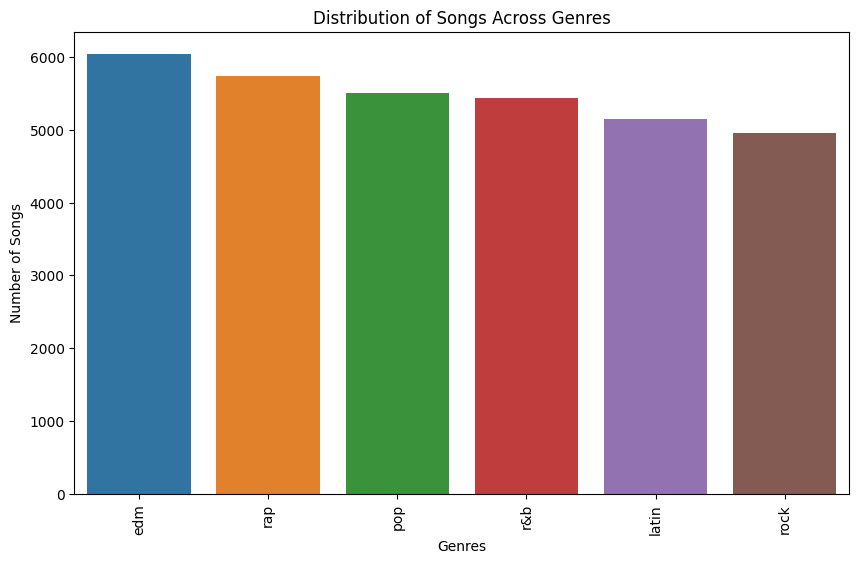

In [ ]:
# Figure show distribution of songs across genres
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='playlist_genre', order=df['playlist_genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Songs Across Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Songs')
plt.show()

In [ ]:
songs = df.groupby(['track_name', 'playlist_genre']).sum()
songs = songs.sort_values(['track_popularity'], ascending=False)
songs.head(10)

<ipython-input-50-c6a675068e54>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  songs = df.groupby(['track_name', 'playlist_genre']).sum()


,,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_name,playlist_genre,,,,,,,,,,,,,
Eye of the Tiger,rock,547,7.384,4.571,0,-110.545,0,0.3059,1.746000,0.004158,0.7315,5.051,980.129,2150266
Señorita,latin,487,5.151,4.310,61,-41.245,1,0.4141,0.546900,0.000000,0.6645,5.059,784.346,1340228
Happy Now,pop,484,3.778,3.782,44,-38.248,6,0.4144,2.654000,0.000003,1.1504,2.884,648.666,1259508
Dream On,rock,461,2.911,4.278,26,-66.120,5,0.2380,2.209742,0.059993,2.1553,1.822,956.107,2061143
Poison,rock,442,2.048,6.332,14,-44.291,0,0.7790,0.305900,0.000765,1.0120,1.926,830.944,1891014
I Don't Care (with Justin Bieber),latin,438,3.990,3.375,30,-25.205,5,0.2210,0.456000,0.000000,0.4470,4.210,509.780,1099735
Sola,latin,429,4.865,4.399,44,-41.764,0,1.2762,2.801000,0.000104,1.7129,4.067,838.866,1398218
No Me Conoce - Remix,latin,424,3.994,3.942,50,-19.227,0,0.3279,0.722000,0.000000,0.4549,2.891,459.898,1540881
Dance Monkey,pop,420,4.902,3.808,38,-36.854,0,0.7094,3.785000,0.000933,1.0710,2.957,608.392,1240344


In [ ]:
songs = df.sort_values(['track_album_release_date'], ascending=False)
songs.head(10)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
382,71jxHnEfeDyolLb6Kr2DdS,別世界,E-girls,29,3L0Bqb0cKawJ8ymATqB0KY,別世界,2020-01-29,Dance Pop: Japan,37i9dQZF1DXahYFr91pFvG,pop,...,5,-2.965,1,0.1580,0.194000,0.000000,0.0898,0.7860,127.075,224882
1198,1nihX7AXe5qdt3OmDcstTb,Senses,KINGDØMS,41,6cI8Fq1iIqpuXovoGjgQap,Senses,2020-01-20,TUNES DANCE AND POP,3arpkhoRWXEYbdCpVAIrRR,pop,...,9,-7.492,1,0.0791,0.019400,0.001320,0.0882,0.2810,115.999,237026
27288,1nihX7AXe5qdt3OmDcstTb,Senses,KINGDØMS,41,6cI8Fq1iIqpuXovoGjgQap,Senses,2020-01-20,Electro Vibes,0wHHL0TLztL3muzXLCDTQP,edm,...,9,-7.492,1,0.0791,0.019400,0.001320,0.0882,0.2810,115.999,237026
5958,78L2RUFISfqkmZMTCLYQJC,100 dni do matury,Mata,52,2XEybHzEROxx8nLUOrtSbL,100 dni do matury,2020-01-17,Generacja Hip Hop,37i9dQZF1DWXJnyndhASBe,rap,...,6,-7.911,0,0.4560,0.523000,0.000000,0.3400,0.0999,159.934,301573
18394,57Txi01yKbzaqFP3EmwO4Q,The Way We Thought,The Outset,4,1HAHzP5SM5hKelemd09Hc6,The Way We Thought,2020-01-17,INDIE POP! TUNES,0HD4Pc1PK8fsyKQq9e2U2v,latin,...,1,-6.634,0,0.0412,0.029600,0.000008,0.1250,0.1060,178.340,213761
15147,31XxO16aGfm37OOK6uBGtE,Threat,Zero Theorem,6,0SSmpagAr6upXjib2U3ZFD,The Killing I,2020-01-17,Hard Rock Workout,5nOO372uzpOM5rB2bRWfkp,rock,...,6,-4.731,0,0.1440,0.000653,0.000077,0.2060,0.2900,176.056,190057
30233,34o7op5h46HN2bbqnm0dCh,Hold Me Close,PuFFcorn,26,6n4fxcTyotuCQziXYXpC6b,Hold Me Close,2020-01-17,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,edm,...,10,-5.381,1,0.0489,0.021700,0.000000,0.3430,0.3090,127.930,196348
6787,5zntHJg9JeFCOgD0yskuq3,Invierno,Faruz Feet,31,4f0iuEJ66gNenOENDbjva8,Faruz Vs. Proof,2020-01-17,Arena Hip-Hop,37i9dQZF1DWVFZbCNivv6B,rap,...,1,-6.409,1,0.3100,0.025800,0.000000,0.1200,0.7160,85.048,218154
18395,2izRAdFIQ2ccslSDxO4wp7,Start Over,Able Faces,7,2k6dXlxqrt3DFq4cMkmTI0,Start Over,2020-01-17,INDIE POP! TUNES,0HD4Pc1PK8fsyKQq9e2U2v,latin,...,8,-7.038,1,0.0340,0.005520,0.000000,0.3120,0.4610,92.029,211424
32167,4OX6I7otVz7ANxPh6uCG9B,Just A Dream - Flaremode & Adler Remix,Nipri,4,0HNbCxMp3KmtvUx5j9WowM,Just A Dream (The Remixes Pt. 1),2020-01-17,Brand New EDM,2dNitDEHM9FpUGEHWc7zyW,edm,...,5,-5.283,1,0.0316,0.300000,0.000008,0.0652,0.8550,125.047,176640


<ipython-input-52-82304194b18c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_50 = df.groupby(['playlist_genre']).sum()


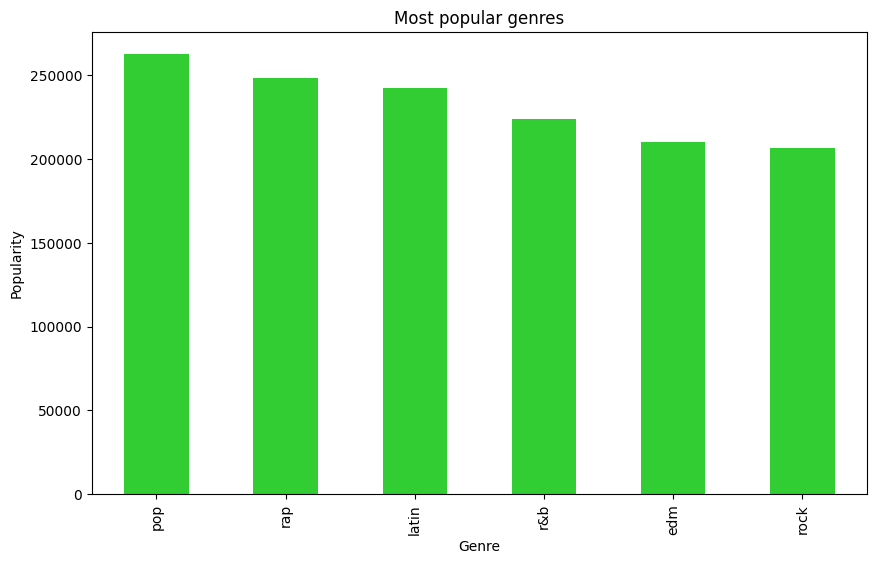

In [ ]:
top_50 = df.groupby(['playlist_genre']).sum()
top_50 = top_50.sort_values(['track_popularity'], ascending=False)
top_50 = top_50.head(50)

plt.figure(figsize=(10, 6))
top_50['track_popularity'].plot(kind='bar', color='limegreen')
plt.title('Most popular genres')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.show()

<ipython-input-53-f4c2179ad970>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_50 = df.groupby(['playlist_genre']).sum()


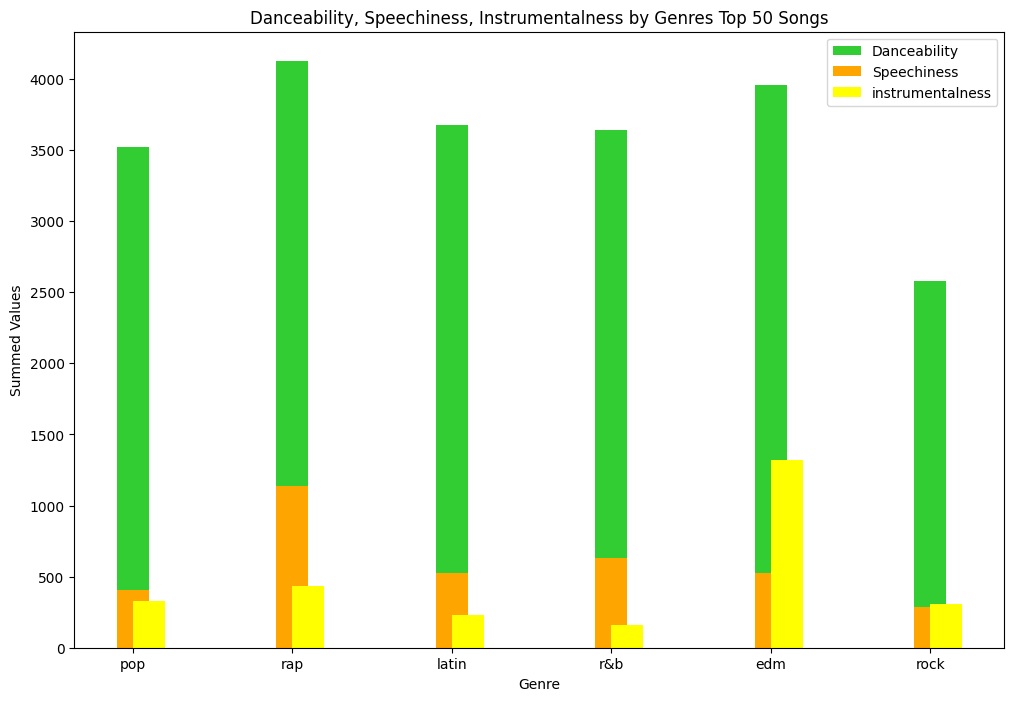

In [ ]:

top_50 = df.groupby(['playlist_genre']).sum()
top_50 = top_50.sort_values(['track_popularity'], ascending=False)
top_50 = top_50.head(50)

plt.figure(figsize=(12, 8))
bar_width = 0.2

plt.bar(top_50.index, top_50['danceability'], color='limegreen', label='Danceability', width=bar_width, align='center')

plt.bar(top_50.index, top_50['speechiness'], color='orange', label='Speechiness', alpha=1, width=bar_width, align='center')

plt.bar(top_50.index, top_50['instrumentalness'], color='yellow', label='instrumentalness', alpha=1, width=bar_width, align='edge')


plt.title('Danceability, Speechiness, Instrumentalness by Genres Top 50 Songs')
plt.xlabel('Genre')
plt.ylabel('Summed Values')
plt.legend()
plt.show()

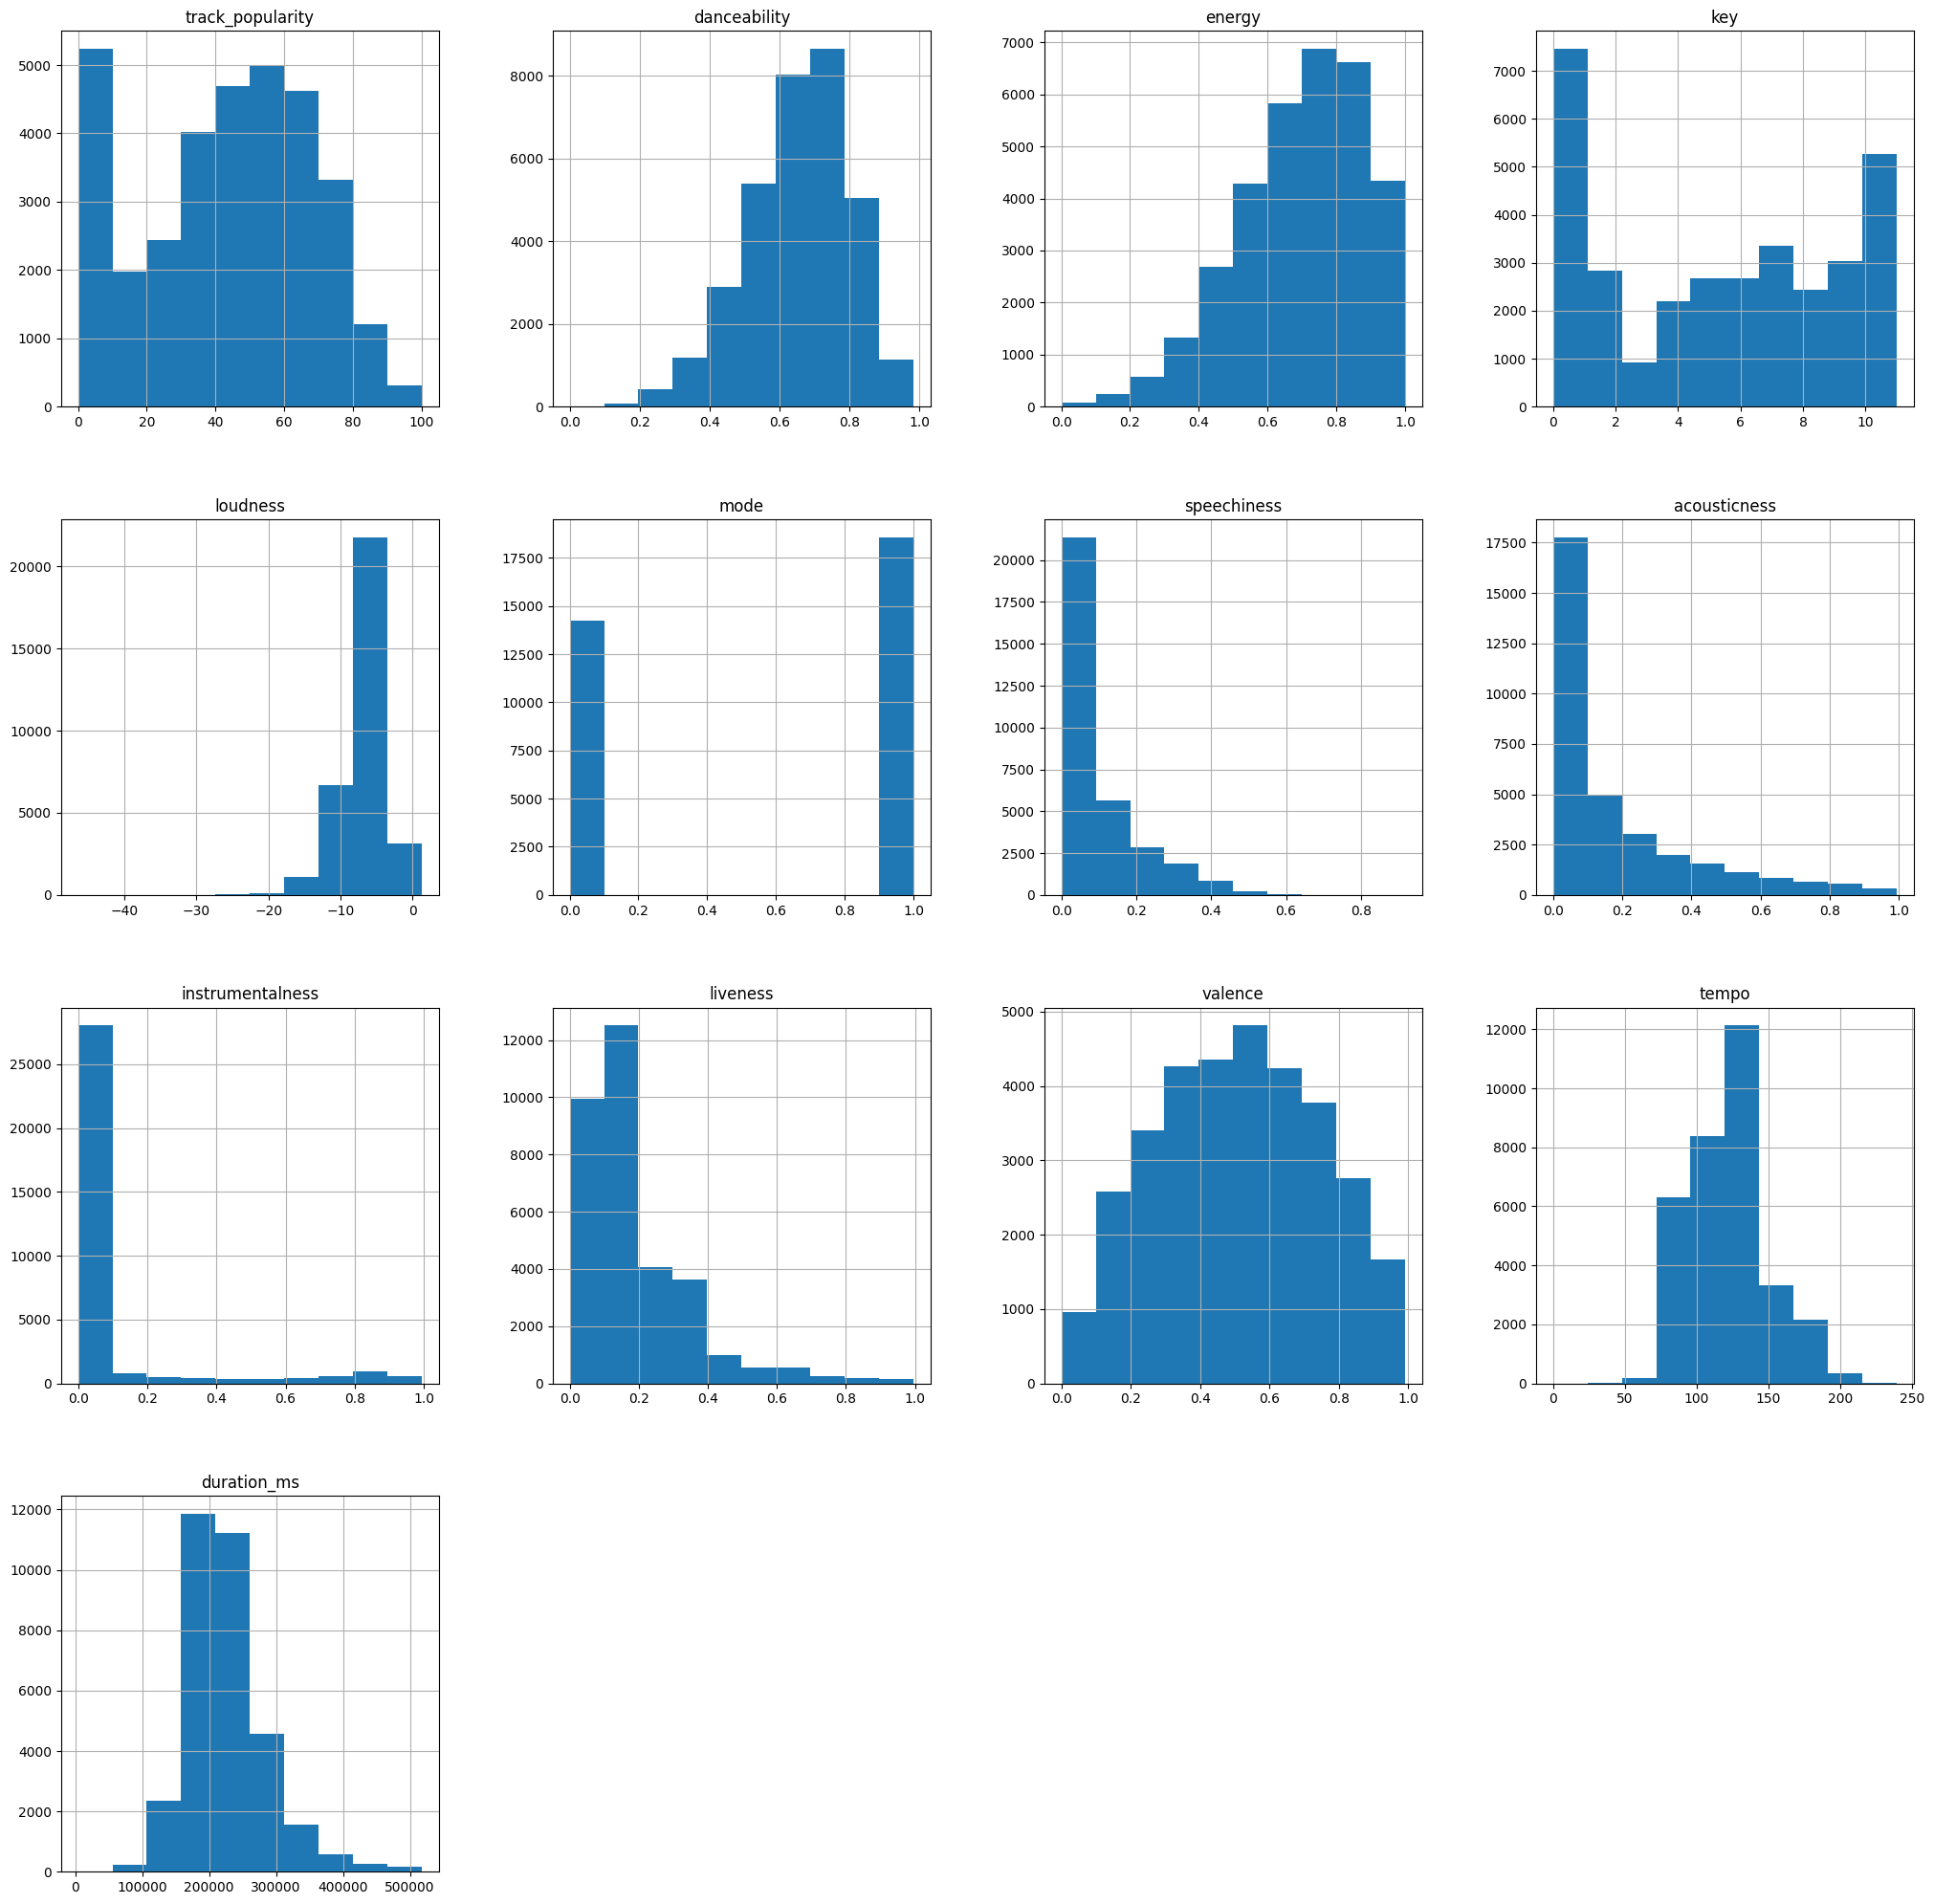

In [ ]:
df.hist(figsize=(25,25));

Key was not included in the features for the model, but it is interesting to see that a majority of songs are in C.

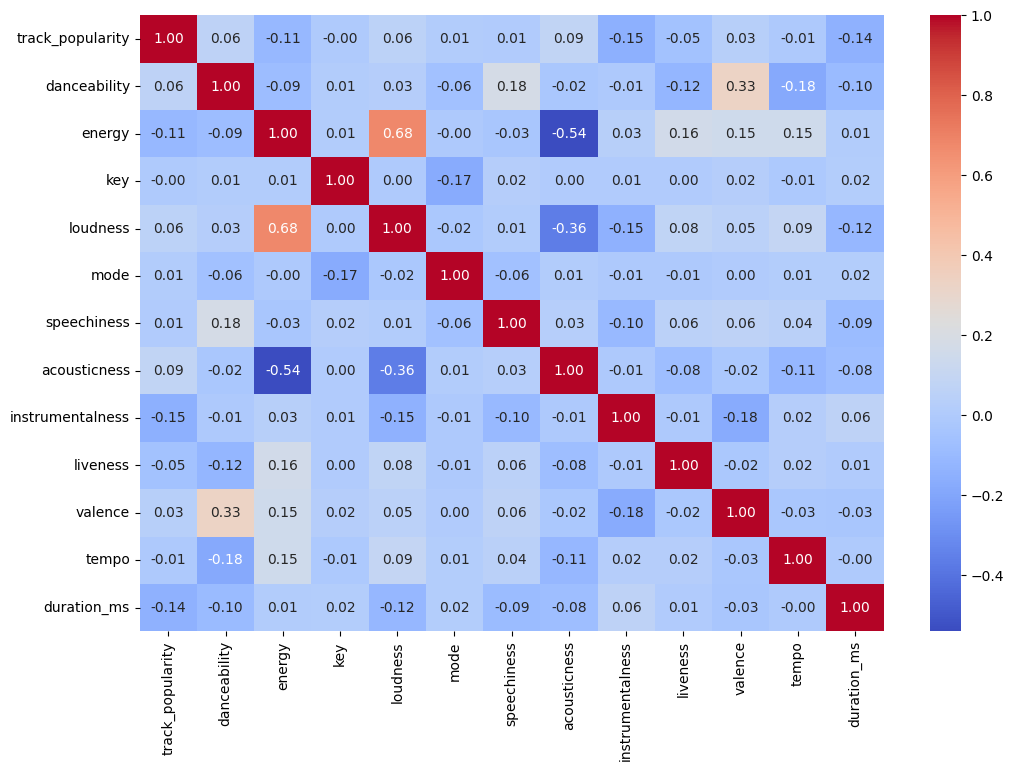

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
# Create a correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

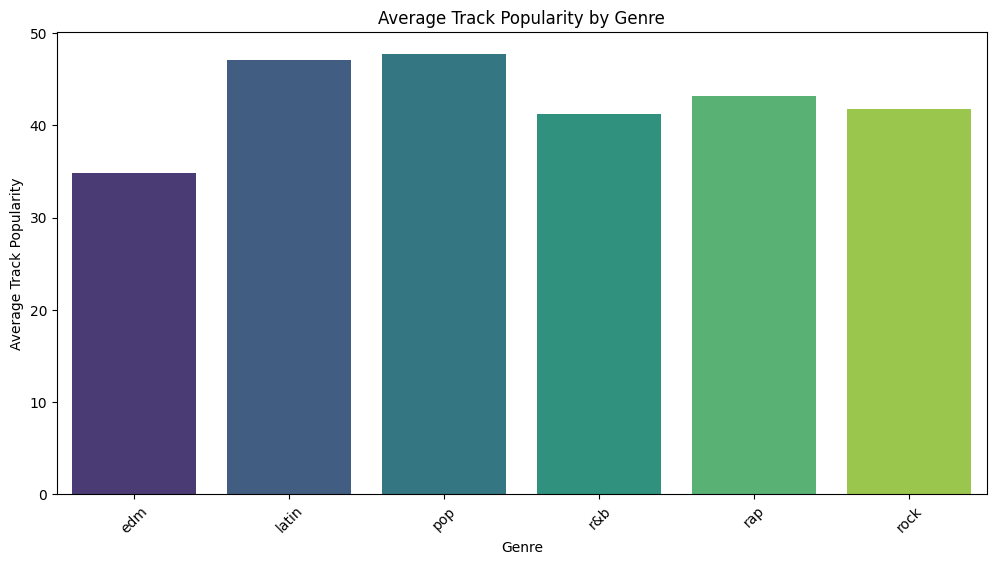

In [ ]:
average_popularity_by_genre = df.groupby('playlist_genre')['track_popularity'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='playlist_genre', y='track_popularity', data=average_popularity_by_genre, palette='viridis')
plt.title('Average Track Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Track Popularity')
plt.xticks(rotation=45)
plt.show()

#Most genres average around 43 popularity, edm has a much lower average and may influence the clusters more.

Latin and pop have the highest popularity which will probably be a consistent theme among clusters with high popularity. The other features will determine more information.

## Conclusions of EDA

* Strong collinearity between loudness and energy
* Energy and acousticness are negatively correlated. Higher energy less acoustics. Boygenius would not too similar to Bad Bunny!
* Danceability and valence have a positive relationship, more dancey, more happy!
* Within genres, pop will most likely have a greater appearance especially with its popularity. The main thing is how the other features influence the clustering outcomes

# Models

## Data Preprocessing and Feature Selection

After choosing the numeric features, we decided to cut key and loudness. Key did not offer meaningful information and loudness was collinear with energy. We experimented with using one or the other and there was not much of a difference so energy was arbitrarily chosen.

In [ ]:
# These are the features we are going to use
selected_features = ['track_popularity', 'danceability', 'energy', 'mode',
                    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

df_features = df[selected_features]

## To scale or not to scale

That is the question. We attempted clustering with scaled and not scaled data using the scikit-learn standard scaler and MinMax scaler. The corresponding silhouette scores were lower and the data increasingly overlapped. While the features are on somewhat different scales, the data is incredibly dense as can be seen below. Not scaling allowed for more clear clusters, and analysis was done with scaled data for better interpretation.

<Axes: >

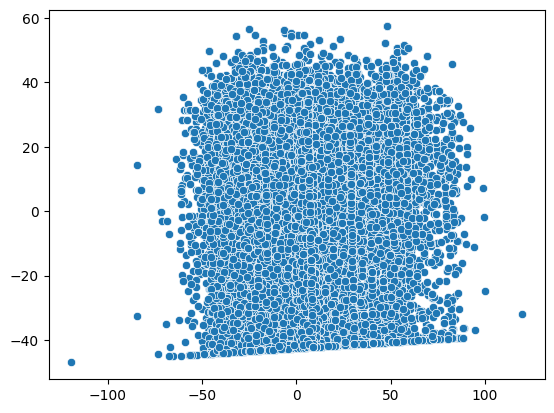

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
df_2d = pca.fit_transform(df_features)

sns.scatterplot(x = df_2d[:, 0], y = df_2d[:, 1])

This is the original view of the data in two dimensions. It is clearly quite dense, so the outcome might actually be more similar to partitioning

## BIRCH

In [ ]:
# This clustering method is better for oddly shaped data
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
from sklearn.cluster import Birch

model_birch = Birch(threshold=0.2, n_clusters=4)
birch_clust = model_birch.fit_predict(df_2d)

### Reasoning for Clusters



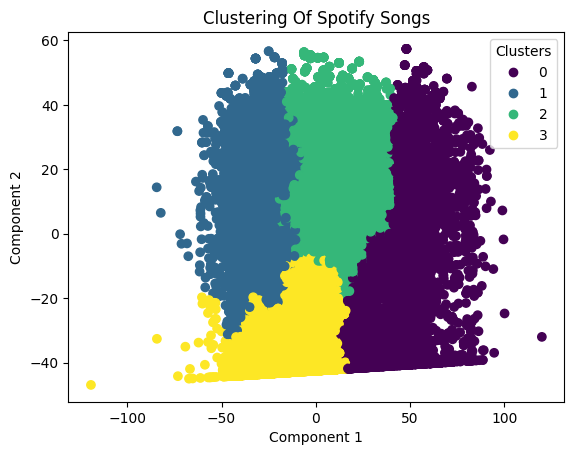

In [ ]:
scatter = plt.scatter(df_2d[:, 0], df_2d[:, 1],c=birch_clust, cmap='viridis')
plt.title('Clustering Of Spotify Songs')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_features, birch_clust, random_state=1)
print(score)

0.3519687989698035


### Evaluation

As can be seen here and will be seen in the other clustering algorithms, the silhouette score is relatively low. Silhouette scoring can range from -1 to 1 and shows how similar values are within the cluster to outside. Now, silhouette scoring is not the end all be all for significance in models, but it helps with interpretation and quality scoring. I find that it is similar in comparison to K-Means and overall works well with the data.

         track_popularity  danceability    energy      mode  speechiness  \
cluster                                                                    
0               -0.310447     -0.580891  0.057583  0.031356     0.340889   
1                0.503891      0.131436 -0.284731 -0.007827     0.109835   
2                0.561793      0.066413  0.068146  0.006289    -0.143399   
3               -1.245087      0.093019  0.193476 -0.019028    -0.114327   

         acousticness  instrumentalness  liveness   valence     tempo  
cluster                                                                
0           -0.008186         -0.129608  0.033908  0.085296  1.701922  
1            0.234708         -0.155429 -0.065681  0.101226 -1.042844  
2           -0.064261         -0.000032 -0.003358 -0.077040  0.314552  
3           -0.170672          0.257382  0.061071 -0.052211 -0.275655  


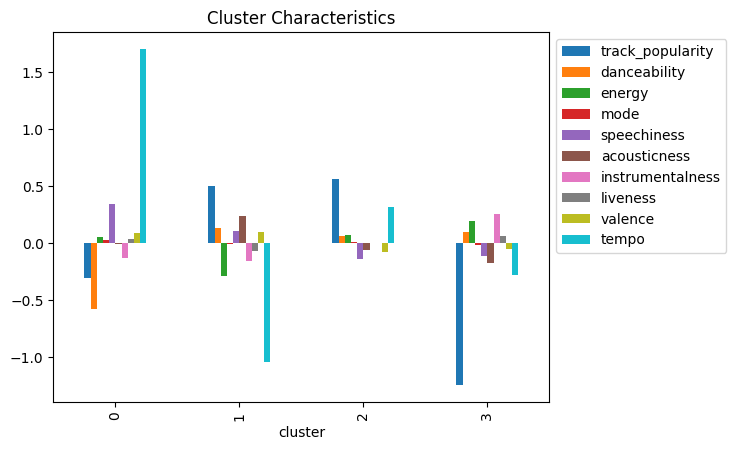

In [ ]:
scaler = StandardScaler()
df_features_scaled = scaler.fit_transform(df_features)
clustered_df = pd.DataFrame(data=df_features_scaled, columns=df_features.columns)
clustered_df['cluster'] = birch_clust

# Now, we can examine the characteristics of the individual clusters
# For example, we can group the data by cluster and compute the mean of each column
cluster_means = clustered_df.groupby('cluster').mean()
print(cluster_means)

# We can also compare the clusters to each other by creating a plot of the cluster means
# This can help us to see how the clusters differ from each other
cluster_means.plot(kind='bar')
plt.title('Cluster Characteristics')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

Tempo and Popularity have a pattern

In [ ]:
birch_a = pd.DataFrame(data=birch_clust, dtype=int)
birch_a.columns = ['k_cluster']

# predictions as a df
print(birch_a.shape)
birch_a.head()

(32828, 1)


,k_cluster
0,2
1,1
2,2
3,2
4,2


In [ ]:
df_cluster = pd.concat([df, birch_a], axis=1)

# checking the dataframe
print(df_cluster.shape)
df_cluster.head()

(32833, 24)


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,k_cluster
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66.0,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-2.634,1.0,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0,2.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67.0,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.969,1.0,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600.0,1.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70.0,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.432,0.0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0,2.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60.0,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.778,1.0,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0,2.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69.0,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.672,1.0,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0,2.0


In [ ]:
df_cluster.loc[df_cluster['k_cluster'] == 0][:5]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,k_cluster
82,1xK7enJZVdv37fnnxoZlPq,With You,Kaskade,71.0,03Rd91m56yw4XklwHF9FHq,With You,2019-06-14,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,-3.815,0.0,0.4860,0.1230,0.000000,0.1900,0.529,172.191,180840.0,0.0
159,0n8ob8S72lvznoVfiwz4qL,Where Are Ü Now,Skrillex,8.0,6Fr2rQkZ383FcMqFyT7yPr,Purpose (Deluxe),2015-11-13,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,-5.053,1.0,0.0620,0.0342,0.000007,0.1400,0.193,139.420,242520.0,0.0
299,6SRWhUJcD2YKahCwHavz3X,Darkside,Alan Walker,76.0,3nzuGtN3nXARvvecier4K0,Different World,2018-12-14,Dance Pop Hits,37i9dQZF1DX6pH08wMhkaI,pop,...,-5.115,0.0,0.0431,0.1310,0.000000,0.1730,0.123,169.988,211680.0,0.0
313,0jvqmWRCyv7xnxqrtinbHJ,Next To Me,Axel Johansson,54.0,2vmWPG2zs3LXAMsfkMOXh6,Next To Me,2018-04-20,Dance Pop Hits,37i9dQZF1DX6pH08wMhkaI,pop,...,-6.724,1.0,0.0575,0.1580,0.000002,0.1280,0.263,175.903,179500.0,0.0
396,1SV5ys0BGnN6aEsbS7prwt,I don’t wanna do,SARM,27.0,6XVrMILrX3enEl9HW9D99w,I don’t wanna do,2020-01-12,Dance Pop: Japan,37i9dQZF1DXahYFr91pFvG,pop,...,-5.125,1.0,0.1390,0.0127,0.000000,0.0546,0.838,187.981,244061.0,0.0


In [ ]:
df_cluster.loc[df_cluster['k_cluster'] == 1][:5].sort_values(['track_popularity'], ascending = False)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,k_cluster
41,6oJ6le65B3SEqPwMRNXWjY,Higher Love,Kygo,87.0,4wquJImu8RtyEuDtIAsfcE,Higher Love,2019-06-28,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-7.159,1.0,0.0324,0.0154,0.000006,0.1010,0.404,103.952,228267.0,1.0
18,0GfS3y8Jd7SHWd9R51s7Fo,Dancing With A Stranger (With Normani) - Cheat...,Sam Smith,69.0,2LDzwN4iZ4qbSA32E9CG4Q,Dancing With A Stranger (With Normani) [Cheat ...,2019-03-08,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-6.722,1.0,0.0542,0.1030,0.003600,0.1380,0.324,111.961,159404.0,1.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67.0,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.969,1.0,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600.0,1.0
6,2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62.0,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.788,0.0,0.0623,0.1870,0.000000,0.1760,0.152,112.648,187675.0,1.0
55,2bZYJvVRN5EqIvAUFhUNls,Flames (with ZAYN) - R3HAB & Skytech VIP Remix,R3HAB,55.0,04MEXjH1XyMV7O0IWDXN5p,Flames (with ZAYN) (R3HAB & Skytech VIP Remix),2019-12-12,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-4.358,0.0,0.1650,0.0148,0.000000,0.0355,0.169,80.444,237686.0,1.0


In [ ]:
df_cluster.loc[df_cluster['k_cluster'] == 2].sort_values(['track_popularity'], ascending = False)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,k_cluster
23104,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99.0,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,-5.616,0.0,0.1480,0.05220,0.000000,0.4600,0.457,116.735,163636.0,2.0
20092,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99.0,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,-5.616,0.0,0.1480,0.05220,0.000000,0.4600,0.457,116.735,163636.0,2.0
22933,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,98.0,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,Pop Hits 2020,5TDtuKDbOhrfW7C58XnriZ,r&b,...,-4.075,1.0,0.0629,0.00147,0.000209,0.0938,0.345,171.017,201573.0,2.0
18308,2b8fOow8UzyDFAE27YhOZM,Memories,Maroon 5,98.0,3nR9B40hYLKLcR0Eph3Goc,Memories,2019-09-20,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,-7.209,1.0,0.0546,0.83700,0.000000,0.0822,0.575,91.019,189486.0,2.0
11184,0nbXyq5TXYPCO7pr3N8S4I,The Box,Roddy Ricch,98.0,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,2019-12-06,Trap Americana,7tkgK1tm9hYkWp7EFyOcAr,rap,...,-6.687,0.0,0.0559,0.10400,0.000000,0.7900,0.642,116.971,196653.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32131,4gPw3HZ18KN0UOniw4UEm3,Headshot,Breathe Carolina,0.0,2dQPyzfZaeO8tsitQ56zgN,Headshot,2018-11-16,Epic Bass Drops | Best House Mixes,4IS7o1utOzhimFEFnj9gmu,edm,...,-3.190,1.0,0.2090,0.07700,0.000433,0.3190,0.726,125.996,126190.0,2.0
31217,7rJQiXkPp3sqKV41oK08e1,Too Delirious,Oscar Barila,0.0,3qE8F06lAIHmKpkFvij88Q,"Organic Sessions, Vol. 2",2013-04-04,Selected House,2JPzPB9jnvJLAYtmCbvZy8,edm,...,-8.603,1.0,0.0554,0.00334,0.890000,0.0682,0.150,124.003,437419.0,2.0
25129,5Z6SweXP6EyUe3Q4zaEnwZ,Stone Cold Gentleman,Ralph Tresvant,0.0,4Bb9MIwmwXZzxtSzfBM2aT,Ralph Tresvant (Expanded),1990-11-27,1987-1997 OLD SKOOL JAMZ,0WicovBbxeB0nvQC6IfuaT,r&b,...,-9.350,0.0,0.0489,0.01380,0.000000,0.0456,0.687,105.549,303773.0,2.0
32261,4M5m5Wud1IFsxTCL9yK0Qo,Heartbeat - Radio Edit,John Dahlbäck,0.0,46C4aRWVfkzrCie76k5CFN,Heartbeat,2014-10-20,"Electrónica, Progressive House, Electro House ...",0o5gKmuET7F3lQnpFxvPO8,edm,...,-3.117,1.0,0.0617,0.01830,0.007560,0.3380,0.136,128.057,190781.0,2.0


In [ ]:
df_cluster.loc[df_cluster['k_cluster'] == 3][:5]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,k_cluster
27,1zzOMDmkRZy0g9f4JTAZKn,Close To Me (with Diplo) (feat. Swae Lee) - CI...,Ellie Goulding,8.0,5bMicFMWsZlRZNTDq9h3oA,Close To Me (Remixes),2019-02-01,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-3.781,0.0,0.0511,0.0325,0.000000,0.333,0.397,125.996,175000.0,3.0
29,1hr5Y2i4NlE3LPvQZ9Q5Ao,When You Leave - Breathe Carolina Remix,Nikki Vianna,30.0,6MhbDWEsAP9Xsgoj0TuEOc,When You Leave (Breathe Carolina Remix),2019-04-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,-2.929,1.0,0.1050,0.0334,0.000000,0.269,0.819,119.885,155080.0,3.0
89,6XqvFyJGdUD5IWee02ARKU,Polaroid,Jonas Blue,16.0,6x8gRx7RDvPckYBzPodW8w,Blue,2018-11-09,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,-4.481,0.0,0.0361,0.2900,0.000000,0.073,0.472,114.043,193377.0,3.0
118,5cE201rNvIkryS8N1dJ5nR,Now That I Found You,Carly Rae Jepsen,5.0,1xqz6l2gObcbw25EqODDCt,Now That I Found You / No Drug Like Me,2019-02-27,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,-5.154,0.0,0.0476,0.0145,0.000000,0.107,0.574,124.169,200318.0,3.0
120,48GmVZwvkoVC5StfMLfNJE,Need U,DVBBS,24.0,2yBTjWwQLEr2i0LTIcUmwT,Need U,2019-08-16,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,-6.479,1.0,0.0995,0.2920,0.000386,0.126,0.471,114.994,219521.0,3.0


### Associated article
https://medium.com/@noel.cs21/balanced-iterative-reducing-and-clustering-using-heirachies-birch-5680adffaa58


### Explanation

BIRCH is a clustering algorithm that is particularly good at hierarchical clustering over large datasets. It uses two steps, building the clustering tree then global clustering. Within this dataset, it is beneficial for a hierarchical option specifically for the largeness of ~30k rows and multi dimensionality.

### Analysis

Scaling the clusters was necessary for analysis, but not necessary for clustering itself.

There are several characteristics of each cluster to note

#### Cluster 0

Low popularity and low danceability with high tempo and above average speechiness. More niche dance tunes.

#### Cluster 1

Higher popularity and danceability with low energy and low tempo. This is a key one to look into as popularity is important for profit potential. The genres from this cluster, in the most popular, is pop. One of the first is Memories by Maroon 5 and Dancing with a Stranger by Sam Smith. Pop songs about romance is a consistent theme.

#### Cluster 2

This is the most popular cluster, but does not show many other significant features other than tempo which is higher. This looks to be similar to cluster 1 but with the variation of faster pop songs. It has higher energy compared to the low energy of cluster 1. Diverse genres.

#### Cluster 3

Does not appear to have a consistent theme, but has much lower popularity.


Overall this does seem to have useful information that the two best genres/areas of music to focus on are slower romantic pop songs and fast upbeat pop and latin/edm/r&b.

## Optics

In [ ]:
from sklearn.cluster import OPTICS

# Apply PCA for dimensionality reduction (creating a new db to not rewrite other PCA and clusters)
pca2 = PCA(n_components=2)
pca_result2 = pca2.fit_transform(df_features)
df_pca2 = pd.DataFrame(data=pca_result2, columns=['PCA1', 'PCA2'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


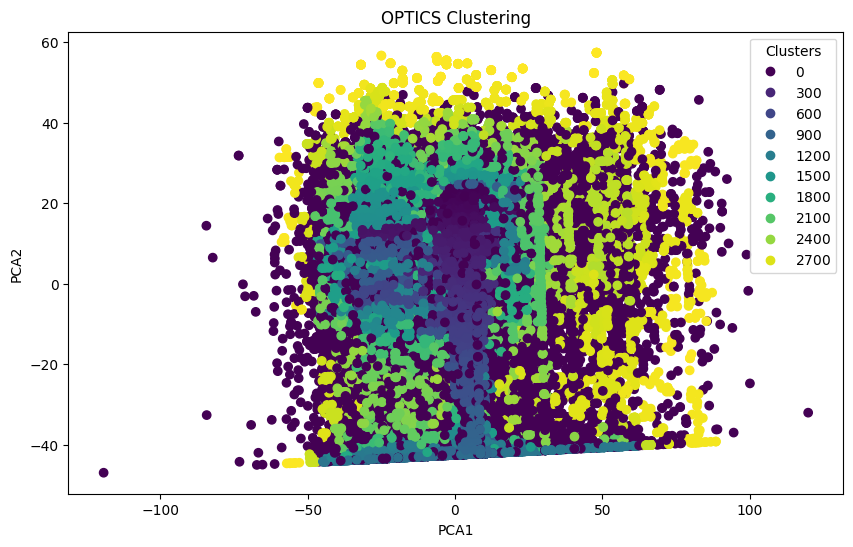

In [ ]:
# Create the OPTICS model (minimal inputs) and run the model to generate clusters
optics = OPTICS(eps = 200)
clusters = optics.fit_predict(df_pca2)

# Add the cluster labels to the DataFrame
df_pca2['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca2['PCA1'], df_pca2['PCA2'], c=df_pca2['Cluster'], cmap='viridis')
plt.title('OPTICS Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

In [ ]:
score = silhouette_score(df_features, clusters, random_state=1)
print(score)

-0.03987826880558768


**Evaluation 1st Optics Model**

As we can see, letting the OPTICS model run with minimal input parameters results in 10 very sporadic clusters. The silhouette score of this model is roughly -0.040, this indicates the model produced overlapping clusters since it is close to 0.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


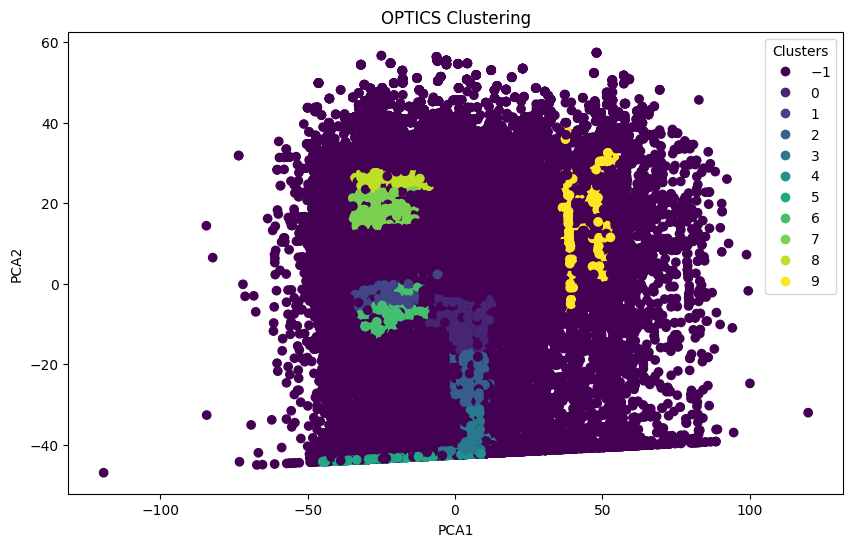

In [ ]:
# Create the OPTICS model (tighter inputs to attempt limiting number of clusters) and run the model to generate clusters
optics = OPTICS(eps=50, min_cluster_size=500, xi=0.25)
clusters = optics.fit_predict(df_pca2)

# Add the cluster labels to the DataFrame
df_pca2['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca2['PCA1'], df_pca2['PCA2'], c=df_pca2['Cluster'], cmap='viridis')
plt.title('OPTICS Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

In [ ]:
score = silhouette_score(df_features, clusters, random_state=1)
print(score)

-0.38703414531215724


**Evaluation 2nd Optics Model**

In this second model we tried decreasing the threshold to enter a cluster (eps value), increased the minimum cluster size (to 500), and increased the steepness of the cluster ordering (xi). These changes were part of many attempts to reduce the number of clusters, but still providing significantly sized clusters as OPTICS tends to produce numerous small clusters. However, these changes resulted in a worse silhouette score of -0.39.



         track_popularity  danceability    energy      mode  speechiness  \
cluster                                                                    
-1               0.109952     -0.045868 -0.049502  0.004489     0.016954   
 0              -0.379168      0.211789  0.393987 -0.036695    -0.217989   
 1              -0.063116      0.266206 -0.216340  0.009993     0.017570   
 2              -0.945825      0.121354  0.489195 -0.063877    -0.238260   
 3              -1.530805      0.071875  0.537343  0.014999    -0.274335   
 4              -1.700696      0.086640  0.615934 -0.095783    -0.294178   
 5              -1.700696      0.165803  0.023098  0.029130     0.178264   
 6              -0.284094      0.245205 -0.118158 -0.022177    -0.043687   
 7               0.775932      0.333633 -0.081576 -0.006019     0.032844   
 8               1.058060      0.411123 -0.067107  0.028777     0.000842   
 9               0.529342     -0.420826  0.040077  0.007589     0.410466   

         ac

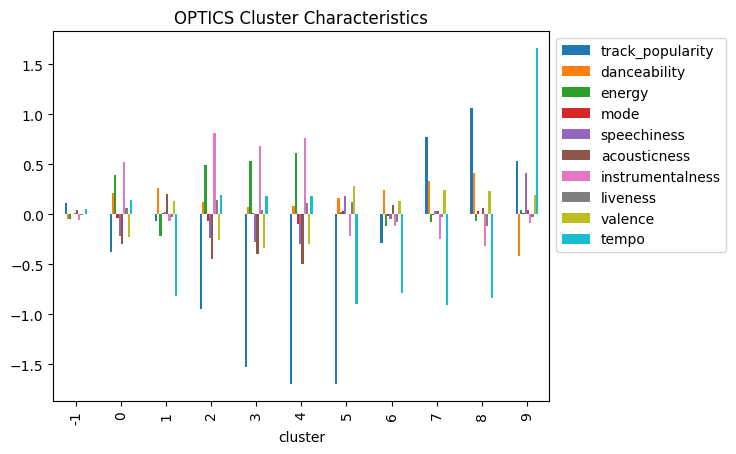

In [ ]:
OPTICS_clustered_df = pd.DataFrame(data=df_features_scaled, columns=df_features.columns)
OPTICS_clustered_df['cluster'] = clusters

# Group the cluster means within the optics clusters df
OPTICS_cluster_means = OPTICS_clustered_df.groupby('cluster').mean()
print(OPTICS_cluster_means)

# Plot the each cluster's mean breakdown
OPTICS_cluster_means.plot(kind='bar')
plt.title('OPTICS Cluster Characteristics')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

**Associated Articles**

https://www.geeksforgeeks.org/ml-optics-clustering-explanation/

https://bobrupakroy.medium.com/optics-clustering-intro-76dcdaf94bde


**OPTICS Analysis**

What is OPTICS?:

Ordering Points To Identify the Clustering Structure is a density-based clustering method that is similar to DBSCAN. OPTICS differs in its ability to develop clusters of varying densities and shapes, while also not requiring a set number of clusters as parameters. The algorithm generates an ordered reachability plot of each point which contains the distance it takes for other data points to reach the current point. The points are then clustered with points that have similar reachability plots and distances. This makes OPTICS very adept at identifying outliers and noise as well as dealing with clusters of differing shapes and densities. This also makes OPTICS have a very complex runtime compared to DBSCAN.


Why does OPTICS fail our data?:


One of the biggest drawbacks with OPTICS is that it struggles to produce clusters when there are no density drops between clusters. Our graphs indicate that this is the primary reason OPTICS is failing because the data is very densely packed together, with close to no room between possible cluster borders. Also through testing, we found that OPTICS models are very sensitive to their inputs, with any slight change to parameters generating wildly differing cluster results. These two aspects combined have proven that OPTICS is not an ideal model to use on our data: with no discernable density drops between points for the model to study and the severe sensitivity of the model when attempting to adjust inputs.


These shortcomings are evident in the cluster output above, as we see groups of clusters contain very similar groupings. For example, clusters 2, 3, and 4 all share almost identical mean breakdowns. Clusters 7 and 8 depict the same issue. These identical cluster breakdowns along with the negative silhouette score indicate that the model is creating clusters that heavily overlap one another.


## K-Means Clustering

Text(0, 0.5, 'Inertia')

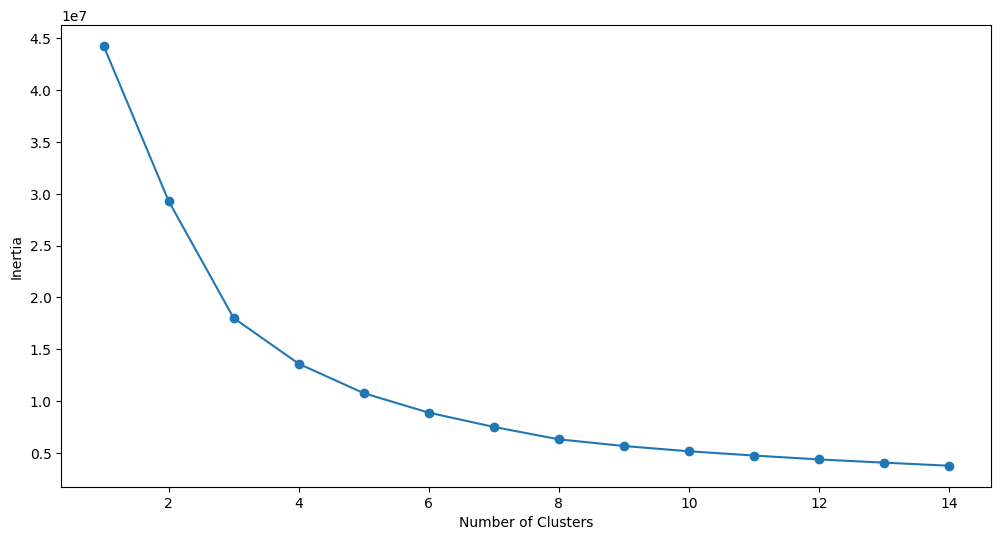

In [ ]:
from sklearn.decomposition import PCA

# fitting multiple
SSE = []
for clusters in range(1, 15):
    kmeans = KMeans(n_clusters=clusters, n_init=10, init='k-means++')
    kmeans.fit(df_features)
    SSE.append(kmeans.inertia_)

# elbow curve
frame = pd.DataFrame({'Cluster':range(1,15), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

### Source:
https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

K-Means clustering aims to cluster based on centroids, where each data point gets "assigned" to a centroid based off of distance. K-Means requires us to know how many clusters we want and how many iterations we want to do.

In this case, it seems 4-6 clusters is best as seen in the elbow curve.

In [ ]:
kmeans = KMeans(n_clusters=4, n_init=10).fit(df_features)

centroids = kmeans.cluster_centers_
print(centroids)

kmeans.inertia_

[[5.70983704e+01 6.68630222e-01 7.12364760e-01 5.68000000e-01
  9.00230321e-02 1.59557566e-01 8.79339666e-02 1.90673349e-01
  4.89076445e-01 1.28346012e+02]
 [1.19680415e+01 6.61040704e-01 7.27909091e-01 5.60246167e-01
  9.70275642e-02 1.43774519e-01 1.29915206e-01 2.00180367e-01
  5.02222716e-01 1.15630288e+02]
 [4.40292618e+01 5.71585192e-01 7.08200194e-01 5.81245843e-01
  1.47970694e-01 1.76018397e-01 5.08885719e-02 1.89406628e-01
  5.33530483e-01 1.69154795e+02]
 [5.67821948e+01 6.74867581e-01 6.47754562e-01 5.61030235e-01
  1.16092161e-01 2.25673083e-01 5.14370237e-02 1.79622251e-01
  5.31946991e-01 9.34870994e+01]]


13603956.802292015

In [ ]:
pred = kmeans.fit_predict(df_features)

from sklearn.metrics import silhouette_score
score = silhouette_score(df_features, pred, random_state=1)
print(score)

0.3780031364063367


A good silhouette score compared to others!

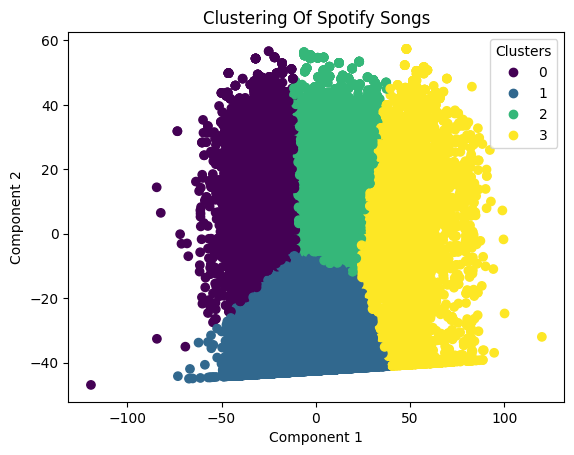

In [ ]:
pca = PCA(n_components = 2)
df_2d = pca.fit_transform(df_features)
scatter = plt.scatter(df_2d[:, 0], df_2d[:, 1],c=pred, cmap='viridis')
plt.title('Clustering Of Spotify Songs')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

As you see, we have 4 clusters, with some overlap however with minimal distance between centroids, not ideal.

         track_popularity  danceability    energy      mode  speechiness  \
cluster                                                                    
0                0.571991      0.138039 -0.280907 -0.009534     0.088675   
1               -1.221338      0.042548  0.161640 -0.011007    -0.099115   
2                0.585602      0.094097  0.076667  0.004820    -0.167335   
3                0.061018     -0.573377  0.052887  0.030758     0.404146   

         acousticness  instrumentalness  liveness   valence     tempo  
cluster                                                                
0            0.228784         -0.148667 -0.068245  0.091075 -1.017536  
1           -0.143626          0.201182  0.064659 -0.035822 -0.195071  
2           -0.071716          0.014196  0.003122 -0.092059  0.278826  
3            0.002437         -0.150722 -0.004551  0.099826  1.795851  


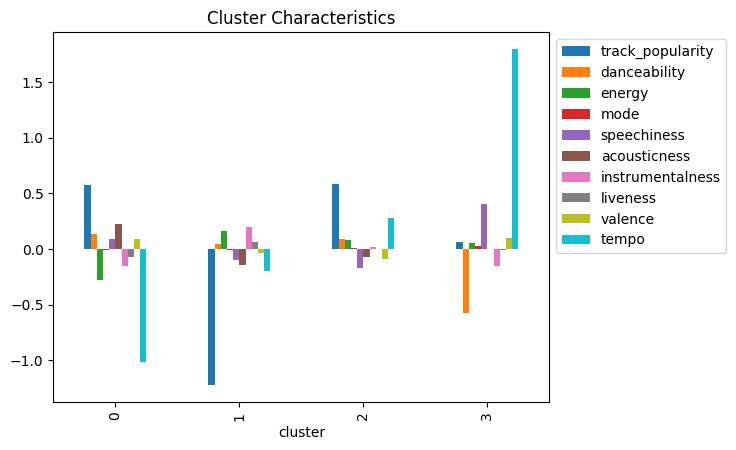

In [ ]:
# Features of each cluster
scaler = StandardScaler()
df_features_scaled = scaler.fit_transform(df_features)
clustered_df = pd.DataFrame(data=df_features_scaled, columns=df_features.columns)
clustered_df['cluster'] = pred

# Now, we can examine the characteristics of the individual clusters
# For example, we can group the data by cluster and compute the mean of each column
cluster_means = clustered_df.groupby('cluster').mean()
print(cluster_means)

# We can also compare the clusters to each other by creating a plot of the cluster means
# This can help us to see how the clusters differ from each other
cluster_means.plot(kind='bar')
plt.title('Cluster Characteristics')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

## Hierarchical Clustering

Hierarchical clustering is a method used in unsupervised machine learning to group similar data points or objects into clusters that form a hierarchy.

#### Dendrogram - Finding Optimal Number of Clusters

To identify the optimal number of clusters for our music dataset, we utilize a dendrogram—a visual representation of hierarchical clustering.


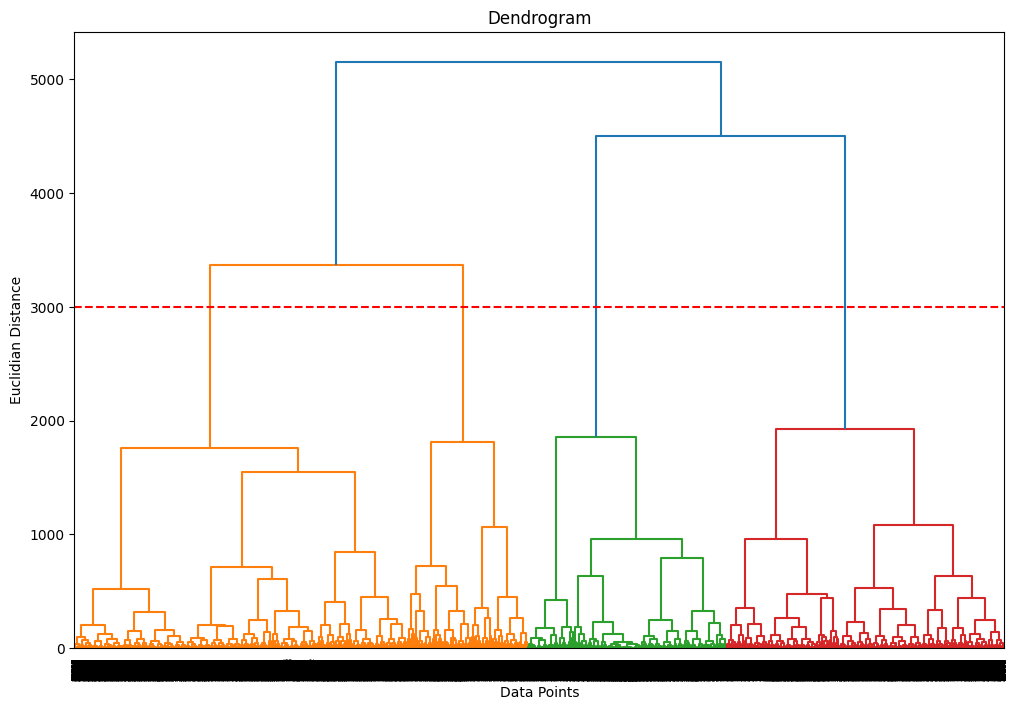

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# 'ward' linkage method minimizes the variance between clusters
linkage_data = linkage(df_features, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_data)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidian Distance')
# Threshold for optimal number of clusters - set to cut the tallest vertical lines in dendrogram
plt.axhline(y=3000, color='r', linestyle='--', label='Threshold')
plt.show()

##### Cluster Size
Based on our dendrogram, the red line intersect 4 vertical lines, meaning our optimal number of clusters is **4**.


###  Agglomerative Clustering Method
Agglomerative Clustering technique is a method employed to group songs into distinct clusters based on their shared features.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Perform agglomerative hierarchical clustering with 4 clusters
agglomerative = AgglomerativeClustering(n_clusters=4)
hier_clust = agglomerative.fit_predict(df_features)

#### Visualize Clusters using PCA (Hierarchical Clustering)

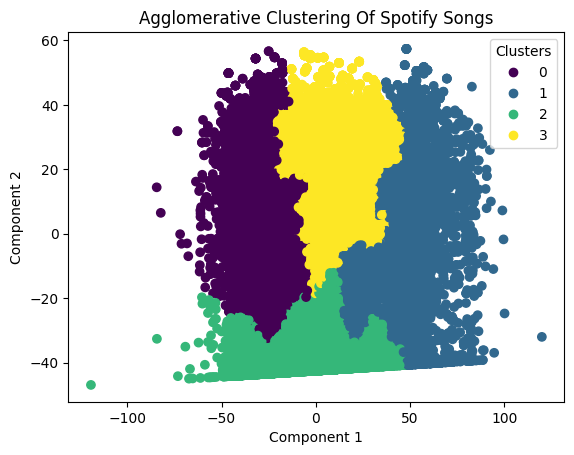

In [ ]:
# Visualizing clusters in a 2D plot

scatter = plt.scatter(df_2d[:, 0], df_2d[:, 1],c=hier_clust, cmap='viridis')
plt.title('Agglomerative Clustering Of Spotify Songs')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

#### Silhouette Score
The silhouette score quantifies the quality of clustering by measuring the cohesion and separation of the clusters.

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_features, hier_clust, random_state=1)
print(score)

0.3409469868416012


A silhouette score of **0.34** indicates a moderate level of clustering quality for the song dataset.

### Hierarchical Cluster Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scaled for analysis
scaler = StandardScaler()
df_features_scaled = scaler.fit_transform(df_features)

# Adding cluster labels to the DataFrame
clustered_df = pd.DataFrame(data=df_features_scaled, columns=df_features.columns)
clustered_df['cluster'] = hier_clust

# Calculate cluster mean
cluster_mean = clustered_df.groupby('cluster').mean()
print(cluster_mean)

         track_popularity  danceability    energy      mode  speechiness  \
cluster                                                                    
0                0.342056      0.144067 -0.261992 -0.005206     0.086142   
1               -0.061525     -0.553782  0.030468  0.033566     0.376976   
2               -1.422792     -0.010031  0.207525 -0.022235    -0.088120   
3                0.585190      0.086218  0.083853  0.005452    -0.155794   

         acousticness  instrumentalness  liveness   valence     tempo  
cluster                                                                
0            0.229208         -0.137218 -0.055176  0.111973 -0.991817  
1            0.017047         -0.125043 -0.000111  0.088628  1.738966  
2           -0.191561          0.254188  0.093606 -0.073808 -0.128366  
3           -0.083214          0.008203 -0.009731 -0.081509  0.274704  


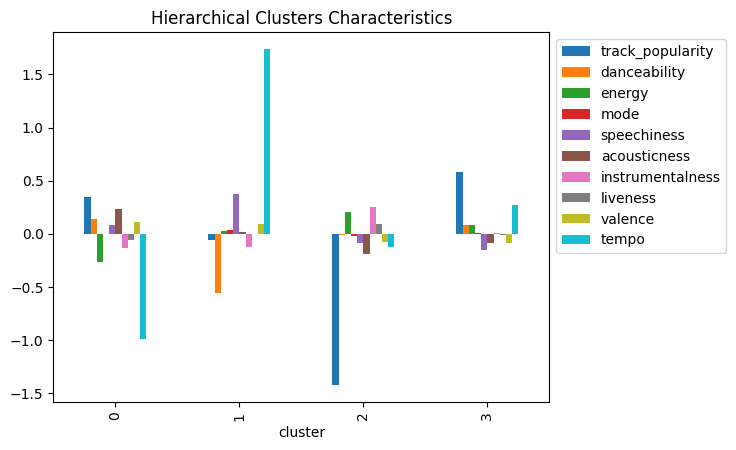

In [ ]:
cluster_mean.plot(kind='bar')
plt.title('Hierarchical Clusters Characteristics')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

### Evaluation

Each cluster demonstrates specific feature tendencies, displaying diversity across various attributes. Understanding these feature variations across clusters could aid in strategic decision-making.

#### Source (Hierarchical Clustering)
https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad

## Conclusion

The K-Means clustering seems to be the best in this case as its silhouette score is around a 37%. So what does this mean? It means that from the audio related features from our dataset, we can cluster them into 4 clusters with little overlap, but they aren't spreadout (distinct). This means that let's say we want to determine if a song is popular based off of audio features, it may be difficult to discern which to use to determine a song's popularity. As determining a song's popularity can help companies decide which artists to pay attention to or which content they should devote money too. What features influence this? It's hard to say, our different clustering models shows us many different patterns in the data.